
### Introduction

##### Background 
Chest computed tomography (CT) scans are a vital diagnostic tool in the field of medicine, providing detailed images that help in the early detection and treatment of various thoracic diseases, including several types of cancer. With the increasing availability of medical imaging data, there is a significant opportunity to leverage advanced machine learning techniques to improve the accuracy and efficiency of diagnostic processes.

**Adenocarcinoma:**
Lung adenocarcinoma is the most common form of lung cancer
accounting for 30 percent of all cases overall and about 40 percent
of all non-small cell lung cancer occurrences. Adenocarcinomas are
found in several common cancers, including breast, prostate and colorectal.
Adenocarcinomas of the lung are found in the outer region of the lung
in glands that secrete mucus and help us breathe.
Symptoms include coughing, hoarseness, weight loss and weakness.

**Large cell carcinoma:**
Large-cell undifferentiated carcinoma lung cancer grows and spreads quickly and can
be found anywhere in the lung. This type of lung cancer usually accounts for 10
to 15 percent of all cases of NSCLC. Large-cell undifferentiated carcinoma tends to grow and spread quickly.

**Squamous cell carcinoma:**
Squamous carcinoma is found centrally in the lung,
where the larger bronchi join the trachea to the lung,
or in one of the main airway branches.
Squamous cell lung cancer is responsible for about 30 percent of all non-small
cell lung cancers, and is generally linked to smoking.

##### Motivation
The classification of chest CT scans into different categories based on the presence and type of cancerous conditions poses a challenging problem due to the subtle variations in imaging that need to be discerned. Traditional diagnostic methods rely heavily on the expertise of radiologists, which can be time-consuming and subject to variability in human interpretation. Automating the classification process using deep learning can augment the radiologist's capabilities, provide second opinions, and decrease diagnostic errors in some applications.

##### Objectives and Approach
The main objective of this project is to develop a model that can accurately classify chest CT scans into four categories: normal, adenocarcinoma, large cell carcinoma, and squamous cell carcinoma. 
The project employs transfer learning using a pre-trained model. This approach is particularly beneficial for medical imaging, where large labeled datasets are scarce and training a model from scratch is computationally expensive. By fine-tuning a pre-trained VGG16 model, I leverage learned features that are generally useful for image recognition tasks, adapting them to the specific task of classifying chest CT images.

#### Significance
The scope of this project is too small to make a meaningful contribution to science, but helps me exercise the skills and processes needed in the growing field of medical artificial intelligence. This includes aiming to enhance diagnostic procedures and support clinical decision-making with automated, precise, and reliable image classification tools in my career.

### Data Information
- Image format: .png
- Image types: Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma, and normal histology
- Data is pre-split into test , train , and validation sets of the following proportions:
    training set is 70%
    testing set is 20%
    validation set is 10%

In [2]:
import zipfile
import os
from collections import Counter

# Path to the zip file
zip_path = '/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/Deep Learning/Final_Project/archive.zip'

# Function to list the contents of the zip file and summarize the structure
def inspect_zip_contents(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # List all files and directories in the zip
        namelist = zip_ref.namelist()
        
        # Count files in each subdirectory
        folder_structure = Counter(os.path.dirname(name) for name in namelist if os.path.dirname(name))
        
        # Print out the contents structure
        for folder, count in folder_structure.items():
            print(f'Folder "{folder}" contains {count} items')
        
        # Show the first few files to get a sense of individual file details
        print("\nSample files:")
        for file in namelist[:10]:
            print(file)

# Run the function to inspect the contents
inspect_zip_contents(zip_path)


Folder "Data/test/adenocarcinoma" contains 120 items
Folder "Data/test/large.cell.carcinoma" contains 51 items
Folder "Data/test/normal" contains 54 items
Folder "Data/test/squamous.cell.carcinoma" contains 90 items
Folder "Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib" contains 195 items
Folder "Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa" contains 115 items
Folder "Data/train/normal" contains 148 items
Folder "Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa" contains 155 items
Folder "Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib" contains 23 items
Folder "Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa" contains 21 items
Folder "Data/valid/normal" contains 13 items
Folder "Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa" contains 15 items

Sample files:
Data/test/adenocarcinoma/000108 (3).png
Data/test/adenocarcinoma/000109 (2).png
Data/test/adenocarcinoma/000109 (4).png
Data/test/adenocarcinoma/000109 (5).png
Data/test/a

The dataset looks well-organized with separate subfolders for training, validation, and test sets, each containing images of chest CT scans for normal cases and various types of cancer.

### Dataset Structure:
- **Training Set:**
  - Adenocarcinoma: 195 items
  - Large Cell Carcinoma: 115 items
  - Normal: 148 items
  - Squamous Cell Carcinoma: 155 items
- **Validation Set:**
  - Adenocarcinoma: 23 items
  - Large Cell Carcinoma: 21 items
  - Normal: 13 items
  - Squamous Cell Carcinoma: 15 items
- **Test Set:**
  - Adenocarcinoma: 120 items
  - Large Cell Carcinoma: 51 items
  - Normal: 54 items
  - Squamous Cell Carcinoma: 90 items


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def load_and_preprocess_data(base_dir, img_size=(224, 224), batch_size=32):
    # Define ImageDataGenerators for training, validation, and test sets with normalization and data augmentation
    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation and test sets

    # Create data generators
    train_generator = train_datagen.flow_from_directory(
        directory=f'{base_dir}/train',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

    validation_generator = test_val_datagen.flow_from_directory(
        directory=f'{base_dir}/valid',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

    test_generator = test_val_datagen.flow_from_directory(
        directory=f'{base_dir}/test',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

    return train_generator, validation_generator, test_generator

# Specify the base directory where the data folders are located
base_dir = '/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/Deep Learning/Final_Project/Data'

# Load the data
train_gen, val_gen, test_gen = load_and_preprocess_data(base_dir)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


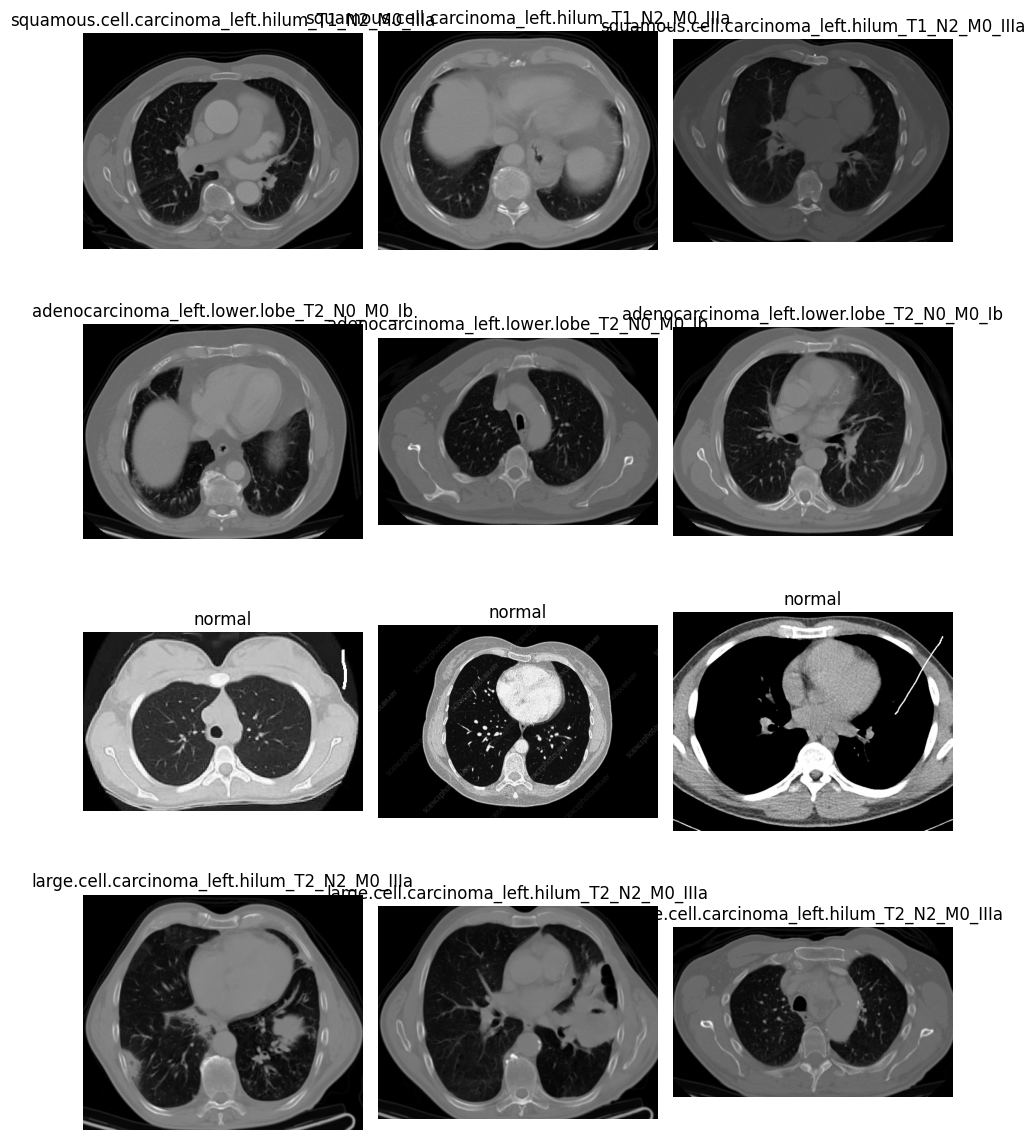

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import pandas as pd

# Function to display sample images from each class
def display_sample_images(data_dir, num_samples=3):
    categories = os.listdir(data_dir)
    fig, axes = plt.subplots(nrows=len(categories), ncols=num_samples, figsize=(num_samples * 3, len(categories) * 3))
    for idx, category in enumerate(categories):
        for jdx, file_name in enumerate(os.listdir(os.path.join(data_dir, category))[:num_samples]):
            img_path = os.path.join(data_dir, category, file_name)
            img = load_img(img_path)
            ax = axes[idx, jdx]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(category)
    plt.tight_layout()
    plt.show()

# Display sample images from each class
display_sample_images(base_dir + '/train', num_samples=3)


Starting analysis in: /Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/Deep Learning/Final_Project/Data/train


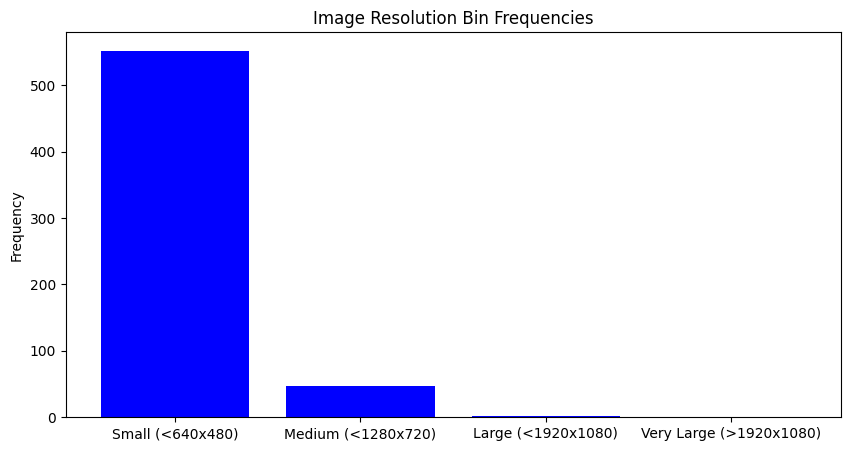

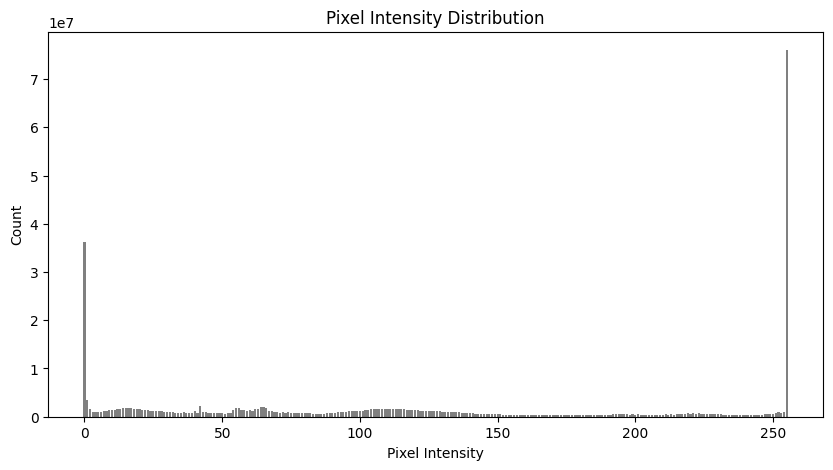

In [6]:
import os
from PIL import Image


# Function to analyze image resolutions and pixel statistics with binning
def analyze_images(data_dir):
    # Define bins for resolution ranges
    resolution_bins = {
        'Small (<640x480)': 0,
        'Medium (<1280x720)': 0,
        'Large (<1920x1080)': 0,
        'Very Large (>1920x1080)': 0
    }
    # Define bins for pixel intensity ranges (0-255)
    pixel_intensity_bins = np.zeros(256, dtype=int)


    # Check if the provided directory exists
    if not os.path.exists(data_dir):
        print(f"Directory does not exist: {data_dir}")
        return

    print(f"Starting analysis in: {data_dir}")

    # Walk through each directory and subdirectory
    for subdir, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(subdir, file)
                with Image.open(file_path) as img:
                    # Bin image resolution
                    width, height = img.size
                    if width * height < 640 * 480:
                        resolution_bins['Small (<640x480)'] += 1
                    elif width * height < 1280 * 720:
                        resolution_bins['Medium (<1280x720)'] += 1
                    elif width * height < 1920 * 1080:
                        resolution_bins['Large (<1920x1080)'] += 1
                    else:
                        resolution_bins['Very Large (>1920x1080)'] += 1
                    
                    # Bin pixel intensities
                    img_array = np.array(img)
                    for intensity in np.nditer(img_array):
                        pixel_intensity_bins[intensity] += 1

    # Plot resolution bin frequencies
    plt.figure(figsize=(10, 5))
    plt.bar(resolution_bins.keys(), resolution_bins.values(), color='blue')
    plt.title('Image Resolution Bin Frequencies')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot pixel intensity bin frequencies
    plt.figure(figsize=(10, 5))
    plt.bar(range(256), pixel_intensity_bins, color='gray')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    plt.show()

# Call the function with the appropriate data directory
analyze_images(base_dir + '/train')


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the base model with local pre-trained weights
base_model = VGG16(
    weights='/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/Deep Learning/Final_Project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,409,924 (154.15 MB)

 Trainable params: 25,695,236 (98.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
base_dir = '/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/Deep Learning/Final_Project/data'

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation and test sets

# Connect the data generators to images in the dataset directories
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'train'),
    target_size=(224, 224),  # Match the input size of the model
    batch_size=20,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'valid'),
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    workers=4,  # Adjust based on your system's capabilities
    use_multiprocessing=True,  # Based on your system, might need to be False
    max_queue_size=10  # Default is 10, adjust as needed
)
# test_generator = val_test_datagen.flow_from_directory(
#     directory=os.path.join(base_dir, 'test'),
#     target_size=(224, 224),
#     batch_size=20,
#     class_mode='categorical'
# )


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.6274 - loss: 0.7681
Test accuracy: 57.46%


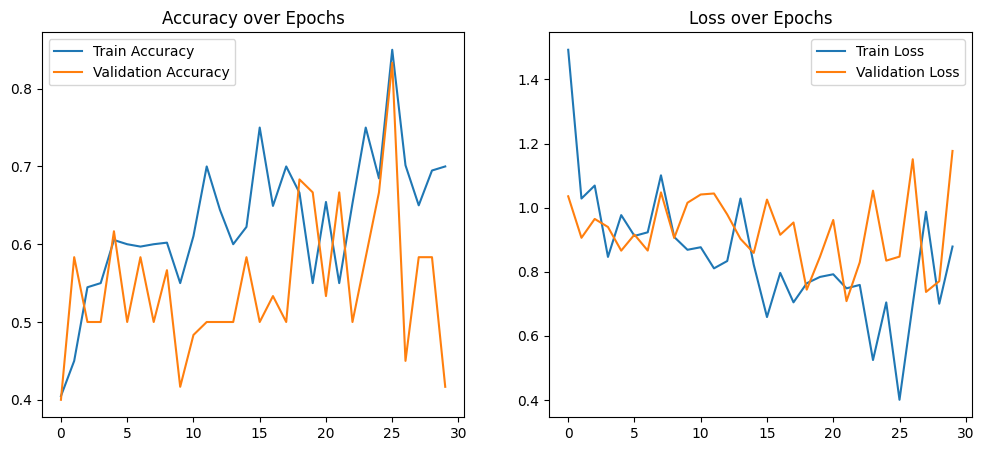

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plotting training and validation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


Observations:
- Fluctuating Validation Metrics: The validation accuracy and loss fluctuate a lot compared to the training metrics. This suggests that the model might be struggling with generalizing to unseen data.
- Divergence Between Training and Validation: Starting from around epoch 10, the training and validation lines begin to diverge significantly, especially in terms of loss. This further supports the likelihood of overfitting.

Adjustments Made:
- Regularization: add dropout layers to help prevent overfitting.
- Reduce Model Complexity: removed some of the layers
- Training for Fewer Epochs: Given that the validation loss starts increasing relative to the training loss as training progresses, I trained for 15 epochs instead of 30

Additional Considerations:
- Learning Rate: I will try a few and see what works best

In [20]:
from tensorflow.keras.layers import Dropout

# Modify the model architecture to include more dropout
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Increased dropout rate
predictions = Dense(4, activation='softmax')(x)

# Rebuild the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5755 - loss: 0.9309
Test accuracy: 55.87%


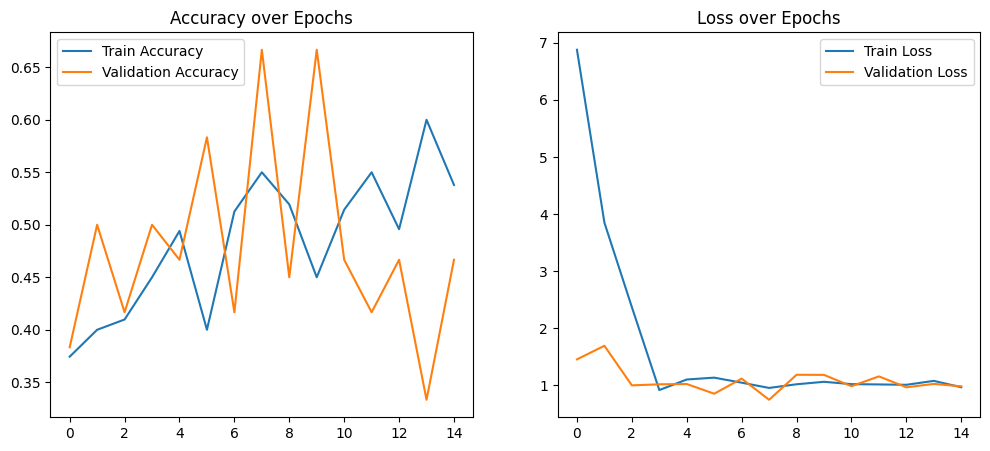

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plotting training and validation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.6174 - loss: 0.9180
Test accuracy: 58.73%


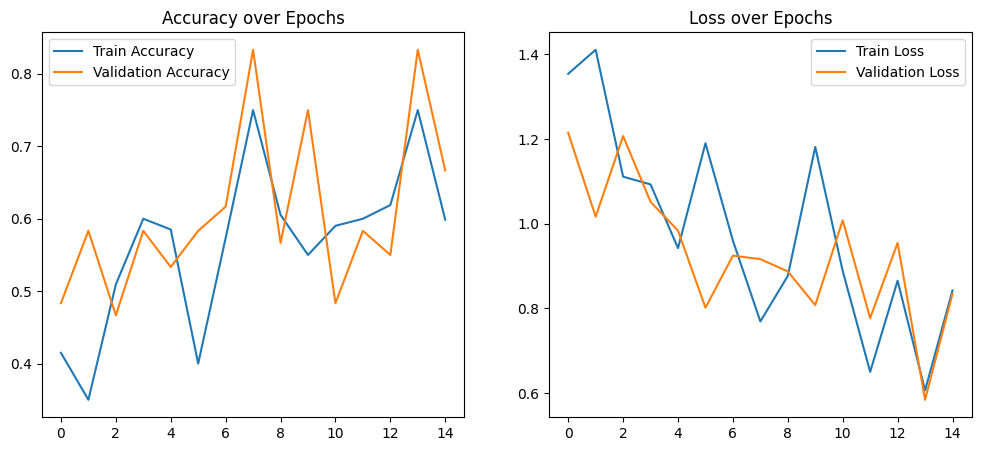

In [22]:
# Evaluate the model after changing parameters
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plotting training and validation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


### Conclusion:

The goal of this project was to develop a convolutional neural network (CNN) capable of classifying chest CT scans into four categories: normal, adenocarcinoma, large cell carcinoma, and squamous cell carcinoma. We aimed to leverage the pre-trained VGG16 model, fine-tune it for our specific task, and evaluate its performance in terms of accuracy and loss metrics. The project demonstrated the potential of using transfer learning and CNNs for medical imaging tasks but also highlighted the critical challenges related to model generalization and stability. The fluctuations in validation accuracy suggest that further work is needed to enhance the robustness of the model.

#### Methodology:
- **Data Preparation**: Utilized `ImageDataGenerator` for image augmentation to prevent overfitting and improve model generalization. Adjustments included resizing, normalization, and augmentation techniques such as rotations and flips.
- **Model Architecture**: Started with VGG16 as the base model, modified the top layers to fit our classification needs, and experimented with hyperparameters like the number of neurons in the dense layers, dropout rates, and batch normalization.
- **Training Process**: Employed techniques such as early stopping and model checkpointing to enhance training efficiency and avoid overfitting. Adjusted learning rates and optimizer settings to find an optimal convergence trajectory.

#### Results:
- **Training Performance**: Achieved a training accuracy that reached up to approximately 80%, showing that the model was capable of learning effectively from the augmented dataset.
- **Validation Performance**: The validation accuracy and loss showed significant volatility, indicating challenges in model generalization to unseen data. Despite efforts to stabilize the training through architectural adjustments and hyperparameter tuning, the model exhibited fluctuations in validation accuracy and loss.

#### Challenges:
- **Overfitting**: Despite using dropout and data augmentation, the model struggled with generalization, which could be due to inherent complexities in the medical imaging data or insufficient variance in the training samples.
- **Hyperparameter Tuning**: Finding the right balance in learning rate, model complexity, and training duration required multiple iterations and adjustments, reflecting the sensitivity of deep learning models to these parameters.

#### Recommendations for Future Work:
- **Cross-Validation**: Implementing k-fold cross-validation could provide a more robust evaluation of the model's performance across different subsets of the data.
- **Advanced Data Augmentation**: Exploring more complex augmentation techniques or synthetic data generation might help the model learn more general features.
- **Alternative Architectures**: Experimenting with other CNN architectures or newer models like EfficientNet might yield better or more stable results.
- **In-depth Feature Analysis**: Conducting a thorough analysis of the features being learned by the model to identify potential biases or gaps in the training data.

This project serves as a learning foundation for further application of skills in the development of deep learning techniques to classify medical imaging data.

#### Citations
- Hany, M. (2020) Chest CT-scan images dataset, Kaggle. Available at: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images/data (Accessed: 20 August 2024). 
Chest cancer: Harold C. Simmons comprehensive cancer center: Condition: UT southwestern medical center (no date) Harold C. Simmons Comprehensive Cancer Center | Condition | UT Southwestern Medical Center. Available at: https://utswmed.org/conditions-treatments/chest-cancer/#:~:text=Chest%20cancers%20%E2%80%93%20also%20known%20as,%2C%20thymus%20gland%2C%20and%20heart. (Accessed: 20 August 2024). 
- Knight, W. (2022) Google shows how AI might detect lung cancer faster and more reliably, MIT Technology Review. Available at: https://www.technologyreview.com/2019/05/20/135287/google-shows-how-ai-might-detect-lung-cancer-faster-and-more-reliably/ (Accessed: 20 August 2024). 
- Prasadseemakurthi Prasadseemakurthi/deep-neural-networks-healthcare: Tangible and practical deep learning projects repository for healthcare such as cancer, Drug Discovery, genomic and more, GitHub. Available at: https://github.com/prasadseemakurthi/Deep-Neural-Networks-HealthCare?tab=readme-ov-file#deep-computational-biology (Accessed: 20 August 2024). 